# Atelier 1 : Apprentissage non supervisé avec Python

### nom complet : khalid OUHMAID

In [20]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

warnings.filterwarnings('ignore')

## I. Réduction de dimensions et Visualisation des données

#### Analyse en Composantes Principales

### Villes dataset

In [21]:
ville = pd.read_csv("./villes.csv",sep=";")
ville.head(5)

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


array([[<AxesSubplot:title={'center':'janv'}>,
        <AxesSubplot:title={'center':'fev'}>,
        <AxesSubplot:title={'center':'mars'}>],
       [<AxesSubplot:title={'center':'avril'}>,
        <AxesSubplot:title={'center':'mai'}>,
        <AxesSubplot:title={'center':'juin'}>],
       [<AxesSubplot:title={'center':'juil'}>,
        <AxesSubplot:title={'center':'aout'}>,
        <AxesSubplot:title={'center':'sept'}>],
       [<AxesSubplot:title={'center':'oct'}>,
        <AxesSubplot:title={'center':'nov'}>,
        <AxesSubplot:title={'center':'dec'}>]], dtype=object)

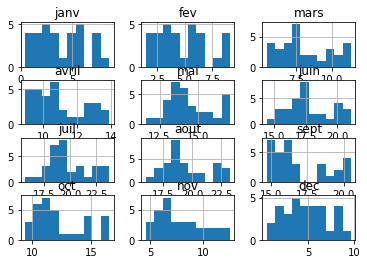

In [22]:
ville.hist()


In [23]:
X = ville.iloc[:, 1:13].values
labels = ville.iloc[:, 0].values

In [24]:
scaler = StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)


### Analyse en Composantes Principales

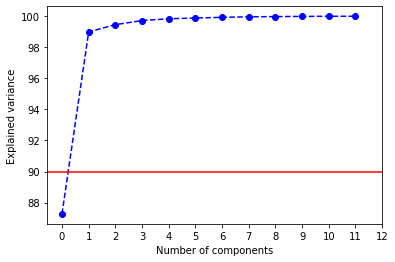

In [25]:
pca_90 = PCA(random_state=50).fit(X_scaled)
plt.plot(np.cumsum(pca_90.explained_variance_ratio_ * 100),
         marker='o',linestyle='--', color='b')
plt.xticks(np.arange(0,13, step=1))
plt.axhline(y=90,color='r',linestyle='-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

In [26]:
pca_90.components_[: 1]

array([[0.27151028, 0.28846164, 0.3010811 , 0.30354174, 0.28353089,
        0.27841907, 0.27290295, 0.28757774, 0.30472022, 0.3038548 ,
        0.29242808, 0.2729549 ]])

 Pour garder 90% d'informations on a besoin que 2 axes 

In [27]:
pca_90 = PCA(n_components=0.9, random_state=50)
pca_90.fit(X_scaled)

print("Information % : ", sum(pca_90.explained_variance_ratio_ * 100))

X_pca = pca_90.transform(X_scaled)

pca_90.explained_variance_ratio_ * 100

Information % :  98.9887952926856


array([87.26819349, 11.7206018 ])

#### Interpretation : le premier axe comporte 87.26% d'informations et le deuxieme comporte 11.72% d'information
#### alors les deux axes sont suffisants pour prendre le max d'informations et les autres axes ne comprte que 2% d'nformations
#### donc on a perdu 2% d'informations

### visualisation graphique des villes projetées dans le plan

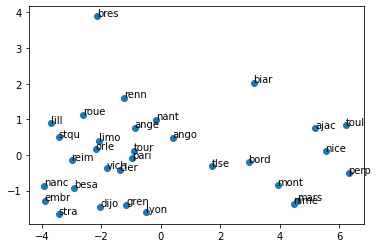

In [28]:
plt.scatter(X_pca[:,0],X_pca[:,1])
for label, x, y in zip(labels, X_pca[:,0],X_pca[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')    
plt.show()

### crimes dataset

In [122]:
crimes = pd.read_csv("./crimes.csv",sep=";")
crimes.head(5)

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


array([[<AxesSubplot:title={'center':'Meutre'}>,
        <AxesSubplot:title={'center':'Rapt'}>,
        <AxesSubplot:title={'center':'Vol'}>],
       [<AxesSubplot:title={'center':'Attaque'}>,
        <AxesSubplot:title={'center':'Viol'}>,
        <AxesSubplot:title={'center':'Larcin'}>],
       [<AxesSubplot:title={'center':'Auto_Theft'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

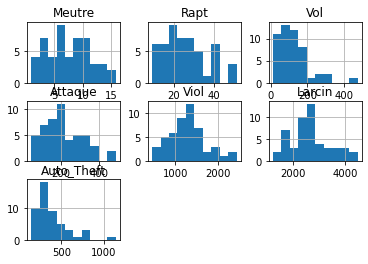

In [123]:
crimes.hist()



In [124]:
C = crimes.iloc[:, 1:8].values
labels_C = crimes.iloc[:, 0].values

In [125]:
scaler = StandardScaler()

scaler.fit(C)

C_scaled = scaler.transform(C)

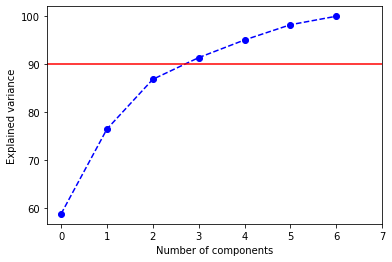

In [126]:
pca_C_90 = PCA(random_state=50).fit(C_scaled)
plt.plot(np.cumsum(pca_C_90.explained_variance_ratio_ * 100),
         marker='o',linestyle='--', color='b')
plt.axhline(y=90,color='r',linestyle='-')
plt.xlabel('Number of components')
plt.xticks(np.arange(0,8, step=1))
plt.ylabel('Explained variance')
plt.show()

 Pour garder 90% d'informations on a besoin que 3 axes 

In [127]:
pca_C_90 = PCA(n_components=0.90, random_state=50)
pca_C_90.fit(C_scaled)

print("Information % : ", sum(pca_C_90.explained_variance_ratio_ * 100))

C_pca = pca_C_90.transform(C_scaled)

pca_C_90.explained_variance_ratio_ * 100

Information % :  91.37042876203037


array([58.78513586, 17.69602616, 10.36880895,  4.5204578 ])

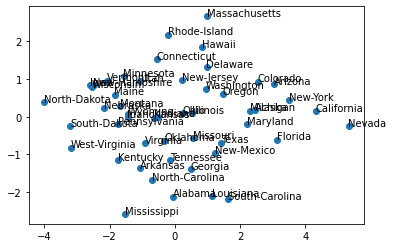

In [128]:
plt.scatter(C_pca[:,0],C_pca[:,1])
for label, x, y in zip(labels_C, C_pca[:,0],C_pca[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')    
plt.show()

### 50 startups

In [129]:
startup = pd.read_csv("./50_Startups.csv", sep=";")
startup.head()


,Id,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,1,165349.20,136897.80,471784.10,192261.83
1,2,162597.70,151377.59,443898.53,191792.06
2,3,153441.51,101145.55,407934.54,191050.39
3,4,144372.41,118671.85,383199.62,182901.99
4,5,142107.34,91391.77,366168.42,166187.94


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'Depenses R&D'}>],
       [<AxesSubplot:title={'center':'Depenses Administration'}>,
        <AxesSubplot:title={'center':'Depenses Marketing Spend'}>],
       [<AxesSubplot:title={'center':'Benefice'}>, <AxesSubplot:>]],
      dtype=object)

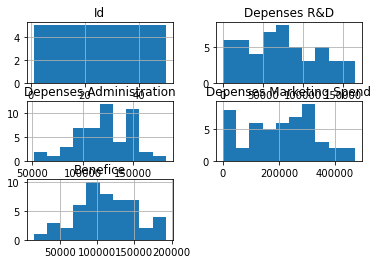

In [130]:
startup.hist()


In [131]:
S = startup.iloc[:, 1:5].values
labels_S = startup.iloc[:, 0].values

In [132]:
scaler = StandardScaler()

scaler.fit(S)

S_scaled = scaler.transform(S)

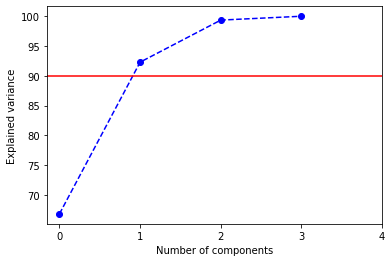

In [133]:
pca_S_90 = PCA(random_state=50).fit(S_scaled)
plt.plot(np.cumsum(pca_S_90.explained_variance_ratio_ * 100),
         marker='o',linestyle='--', color='b')
plt.axhline(y=90,color='r',linestyle='-')
plt.xlabel('Number of components')
plt.xticks(np.arange(0,5, step=1))
plt.ylabel('Explained variance')
plt.show()

In [134]:
pca_S_90 = PCA(n_components=0.90, random_state=50)
pca_S_90.fit(S_scaled)

print("Information % : ", sum(pca_S_90.explained_variance_ratio_ * 100))

S_pca = pca_S_90.transform(S_scaled)

pca_S_90.explained_variance_ratio_ * 100

Information % :  92.2890874650694


array([66.80439261, 25.48469485])

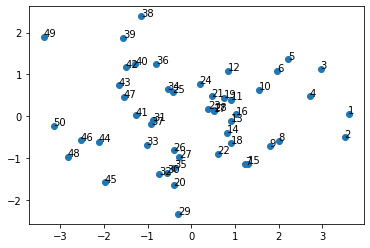

In [135]:
plt.scatter(S_pca[:,0],S_pca[:,1])
for label, x, y in zip(labels_S, S_pca[:,0],S_pca[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')    
plt.show()

## II Clustering

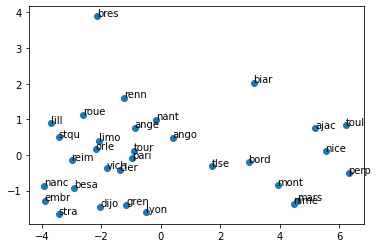

In [141]:
plt.scatter(X_pca[:,0],X_pca[:,1])
for labels, x,y in zip(labels,X_pca[:,0],X_pca[:,1]):
    plt.annotate(labels,xy=(x,y),xytext=(-0.2,0.2),textcoords='offset points')

#plt.show()

### Kmeans

In [137]:
km = KMeans(n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0)
X_km = km.fit_predict(X_pca)

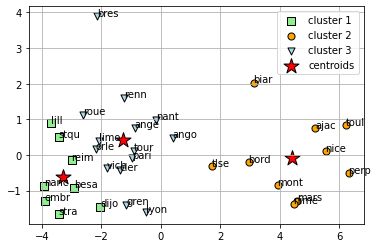

In [138]:
plt.scatter(
    X_pca[X_km == 0, 0], X_pca[X_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X_pca[X_km == 1, 0], X_pca[X_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X_pca[X_km == 2, 0], X_pca[X_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()


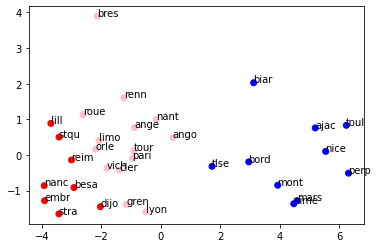

In [140]:
import matplotlib
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= X_km, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

### AgglomerativeClustering

#### ward

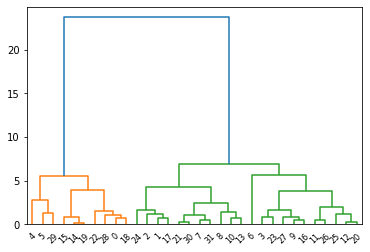

In [99]:
import scipy.cluster.hierarchy as sch
dendrogram_ward = sch.dendrogram(sch.linkage(X_pca, method='ward'))

#### average

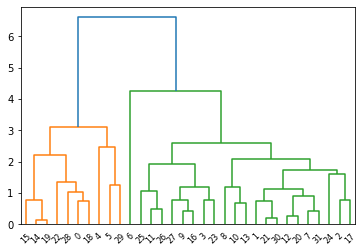

In [100]:
dendrogram_avg = sch.dendrogram(sch.linkage(X_pca, method='average'))

In [101]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X_pca)
labels_clustering = model.labels_

print(labels_clustering)

[1 2 2 0 1 1 0 2 2 0 2 0 0 2 1 1 0 2 1 1 0 2 1 0 2 0 0 0 1 1 2 2]


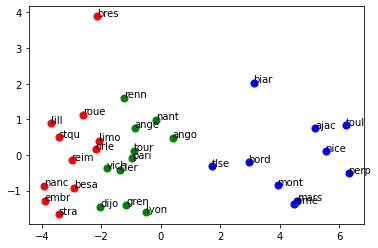

In [102]:
plt.scatter(X_pca[labels_clustering==0, 0], X_pca[labels_clustering==0, 1], s=50, marker='o', color='red')
plt.scatter(X_pca[labels_clustering==1, 0], X_pca[labels_clustering==1, 1], s=50, marker='o', color='blue')
plt.scatter(X_pca[labels_clustering==2, 0], X_pca[labels_clustering==2, 1], s=50, marker='o', color='green')

for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()


In [103]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model.fit(X_pca)
labels_clustering = model.labels_

print(labels_clustering)

[0 1 1 1 0 0 2 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1]


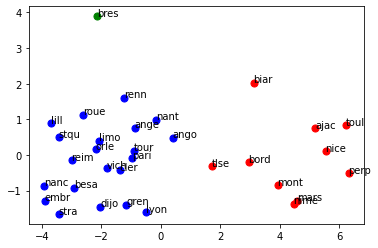

In [104]:
plt.scatter(X_pca[labels_clustering==0, 0], X_pca[labels_clustering==0, 1], s=50, marker='o', color='red')
plt.scatter(X_pca[labels_clustering==1, 0], X_pca[labels_clustering==1, 1], s=50, marker='o', color='blue')
plt.scatter(X_pca[labels_clustering==2, 0], X_pca[labels_clustering==2, 1], s=50, marker='o', color='green')
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

plt.show()

In [105]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
model.fit(X_pca)
labels_clustering = model.labels_

print(labels_clustering)

[1 0 0 0 1 1 2 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0]


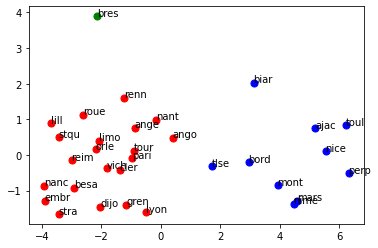

In [106]:
plt.scatter(X_pca[labels_clustering==0, 0], X_pca[labels_clustering==0, 1], s=50, marker='o', color='red')
plt.scatter(X_pca[labels_clustering==1, 0], X_pca[labels_clustering==1, 1], s=50, marker='o', color='blue')
plt.scatter(X_pca[labels_clustering==2, 0], X_pca[labels_clustering==2, 1], s=50, marker='o', color='green')
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

plt.show()

In [107]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
model.fit(X_pca)
labels_clustering = model.labels_

print(labels_clustering)

[0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


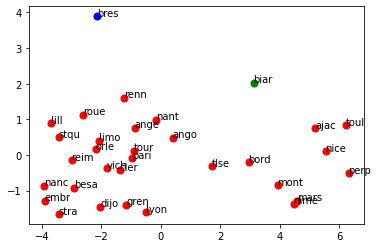

In [108]:
plt.scatter(X_pca[labels_clustering==0, 0], X_pca[labels_clustering==0, 1], s=50, marker='o', color='red')
plt.scatter(X_pca[labels_clustering==1, 0], X_pca[labels_clustering==1, 1], s=50, marker='o', color='blue')
plt.scatter(X_pca[labels_clustering==2, 0], X_pca[labels_clustering==2, 1], s=50, marker='o', color='green')
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

plt.show()

#### metrics

In [109]:
from sklearn import metrics

In [110]:
for i in np.arange(2, 6):
    clustering = KMeans(n_clusters=i).fit_predict(X_pca)
    print("Nombre de cluster : ", str(i), " Metric : ", metrics.silhouette_score(X, clustering,metric='euclidean'))
    print()

Nombre de cluster :  2  Metric :  0.6181156437258204

Nombre de cluster :  3  Metric :  0.3807930016192915

Nombre de cluster :  4  Metric :  0.3804894259927454

Nombre de cluster :  5  Metric :  0.32043108449672886



In [111]:
for i in np.arange(2, 6):
    clustering = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward').fit_predict(X_pca)
    print("Nombre de cluster : ", str(i), " Metric : ", metrics.silhouette_score(X_pca, clustering,metric='euclidean'))
    print()

Nombre de cluster :  2  Metric :  0.6341345030494504

Nombre de cluster :  3  Metric :  0.381537398981024

Nombre de cluster :  4  Metric :  0.397148428850604

Nombre de cluster :  5  Metric :  0.34551245887931764



In [149]:
for i in np.arange(2, 6):
    clustering = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='average').fit_predict(X_pca)
    print("Nombre de cluster : ", str(i), " Metric : ", metrics.silhouette_score(X_pca, clustering,metric='euclidean'))
    print()

Nombre de cluster :  2  Metric :  0.6341345030494504

Nombre de cluster :  3  Metric :  0.5067547529956746

Nombre de cluster :  4  Metric :  0.4128086230188496

Nombre de cluster :  5  Metric :  0.3528957440943905



### 4-interpretation : le meilleur algorithme à utiliser pour obtenir 3 clusters  c'est AgglomerativeClustering avec la methode average

In [ ]:
e